# Interpolate MRMS to 0.25 deg CONUS domain

In [1]:
import os
import sys
import time
import h5py
import pygrib
import numpy as np
from datetime import datetime, timedelta
from scipy.interpolate import RegularGridInterpolator

In [2]:
sys.path.insert(0, '/glade/u/home/ksha/GAN_proj/')
sys.path.insert(0, '/glade/u/home/ksha/GAN_proj/libs/')

from namelist import *
import data_utils as du

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
with h5py.File(save_dir+'CNN_domain.hdf', 'r') as h5io:
    lon_GFS = h5io['lon_GFS'][...]
    lat_GFS = h5io['lat_GFS'][...]

In [5]:
with h5py.File(save_dir+'MRMS_domain.hdf', 'r') as h5io:
    lon_MRMS = h5io['lon_MRMS'][...]
    lat_MRMS = h5io['lat_MRMS'][...]

In [6]:
year = 2023
MRMS_dir = '/glade/campaign/cisl/aiml/ksha/MRMS_{}/'.format(year)

base = datetime(year, 1, 1)

if year == 2020:
    N_days = 366
else:
    N_days = 365

date_list = [base + timedelta(hours=h) for h in range(N_days*24)]

shape_grid = lon_GFS.shape
MRMS_save = np.empty((len(date_list),)+shape_grid); MRMS_save[...] = np.nan

for i_dt, dt in enumerate(date_list):
    
    dt_str = datetime.strftime(dt, '%Y%m%d-%H%M%S')
    filename = MRMS_dir+'MRMS_MultiSensor_QPE_01H_Pass2_00.00_{}.grib2'.format(dt_str)
    try:
        with pygrib.open(filename) as grbio:
            MRMS = grbio[1].values
        MRMS = np.flipud(MRMS)

        hr_to_lr = RegularGridInterpolator((lat_MRMS[:, 0], lon_MRMS[0, :]), MRMS, 
                                            bounds_error=False, fill_value=None)
        MRMS_save[i_dt, ...] = hr_to_lr((lat_GFS, lon_GFS))
    
    except:
        print('{} not exist'.format(filename))
        
tuple_save = (MRMS_save,)
label_save = ['MRMS',]
du.save_hdf5(tuple_save, label_save, '/glade/campaign/cisl/aiml/ksha/GFS/', 'MRMS_01H_y{}_025.hdf'.format(year))

/glade/campaign/cisl/aiml/ksha/MRMS_2023/MRMS_MultiSensor_QPE_01H_Pass2_00.00_20230117-030000.grib2 not exist
/glade/campaign/cisl/aiml/ksha/MRMS_2023/MRMS_MultiSensor_QPE_01H_Pass2_00.00_20230118-220000.grib2 not exist
/glade/campaign/cisl/aiml/ksha/MRMS_2023/MRMS_MultiSensor_QPE_01H_Pass2_00.00_20230119-070000.grib2 not exist
/glade/campaign/cisl/aiml/ksha/MRMS_2023/MRMS_MultiSensor_QPE_01H_Pass2_00.00_20230119-160000.grib2 not exist
/glade/campaign/cisl/aiml/ksha/MRMS_2023/MRMS_MultiSensor_QPE_01H_Pass2_00.00_20230121-020000.grib2 not exist
/glade/campaign/cisl/aiml/ksha/MRMS_2023/MRMS_MultiSensor_QPE_01H_Pass2_00.00_20230127-180000.grib2 not exist
/glade/campaign/cisl/aiml/ksha/MRMS_2023/MRMS_MultiSensor_QPE_01H_Pass2_00.00_20230129-210000.grib2 not exist
/glade/campaign/cisl/aiml/ksha/MRMS_2023/MRMS_MultiSensor_QPE_01H_Pass2_00.00_20230131-200000.grib2 not exist
/glade/campaign/cisl/aiml/ksha/MRMS_2023/MRMS_MultiSensor_QPE_01H_Pass2_00.00_20230214-130000.grib2 not exist
/glade/cam

In [7]:
np.sum(np.isnan(MRMS_save))

38572380

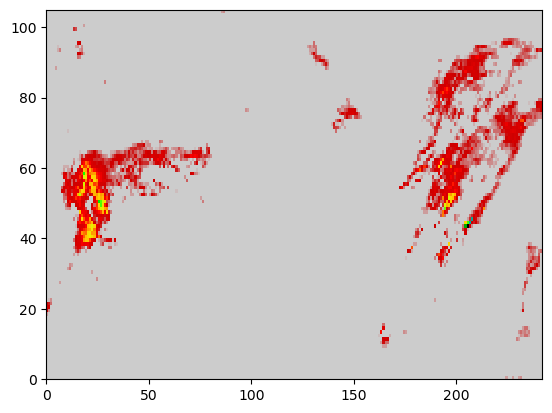

In [7]:
plt.pcolormesh(MRMS_save[i_dt, ...], cmap=plt.cm.nipy_spectral_r)